In [1]:
from self_organizing_map.objects import SOM, RawDataConverter
import os
import matplotlib.pyplot as plt

C:\Users\Apex\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


## Importing data from csv and STF-transforming

In [2]:
path_to_files = 'data'

In [3]:
rdc = RawDataConverter(path=path_to_files, axis='all')

In [4]:
X_train, X_test, y_train, y_test = rdc.train_test_gen([0, 1], [2])

In [5]:
print('Shape of training data: ', X_train.shape, '\n')
print('Shape of training labels: ', y_train.shape)

Shape of training data:  (2724, 257) 

Shape of training labels:  (2724,)


## Train SOM with fit method
The image is the clustering that is chosen with clustering parameter and wanted_clusters

In [6]:
som = SOM(m=10, n=25, dim=X_train.shape[1], n_iterations=30, alpha=0.5, metric='manhattan')

EPOCH: 0 --- TIME 9.659s
EPOCH: 1 --- TIME 9.224s
EPOCH: 2 --- TIME 9.433s
EPOCH: 3 --- TIME 9.528s
EPOCH: 4 --- TIME 9.177s
EPOCH: 5 --- TIME 9.513s
EPOCH: 6 --- TIME 9.203s
EPOCH: 7 --- TIME 9.425s
EPOCH: 8 --- TIME 9.403s
EPOCH: 9 --- TIME 9.244s
EPOCH: 10 --- TIME 9.467s
EPOCH: 11 --- TIME 9.155s
EPOCH: 12 --- TIME 9.570s
EPOCH: 13 --- TIME 9.186s
EPOCH: 14 --- TIME 9.694s
EPOCH: 15 --- TIME 10.250s
EPOCH: 16 --- TIME 9.133s
EPOCH: 17 --- TIME 9.595s
EPOCH: 18 --- TIME 9.237s
EPOCH: 19 --- TIME 9.342s
EPOCH: 20 --- TIME 9.408s
EPOCH: 21 --- TIME 10.823s
EPOCH: 22 --- TIME 10.170s
EPOCH: 23 --- TIME 10.341s
EPOCH: 24 --- TIME 11.184s
EPOCH: 25 --- TIME 9.775s
EPOCH: 26 --- TIME 10.847s
EPOCH: 27 --- TIME 14.427s
EPOCH: 28 --- TIME 11.025s
EPOCH: 29 --- TIME 12.216s


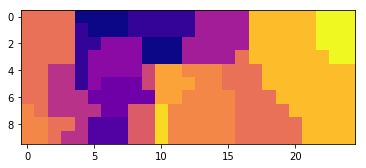

In [7]:
som.fit(X_train)

## Comparison clustering with Algorithm vs. U-matrix
Clustering on trained map can be performed with agglomerative clustering (or k-means) or watershed of the u-matrix:

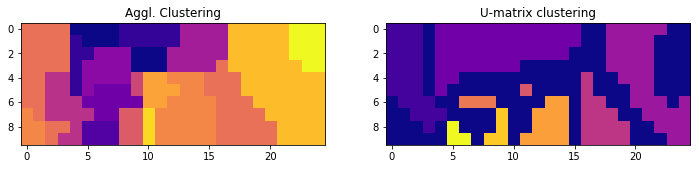

In [8]:
from objects import get_watershed

fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].imshow(som.cluster, cmap='plasma')
ax[0].set_title('Aggl. Clustering')

clustering_umatrix = get_watershed(som.get_umatrix())
ax[1].imshow(clustering_umatrix, cmap='plasma')
ax[1].set_title('U-matrix clustering')
plt.show()

## Predicting values with predict methods


In [9]:
y_pred1 = som.predict(X_test)
y_pred2 = som.predict_w_umatrix(X_test)

Dauer = 1.301 s
QE = 56.667
Dauer = 1.281 s
QE = 56.667


## Comparing predictions with labels

### Adjusting the labels to fit the numbering of the labels:

In [10]:
from utility_funcs import mat_compare_v3

In [11]:
y_pred1 = mat_compare_v3(y_test, y_pred1)
y_pred2 = mat_compare_v3(y_test, y_pred2)

## Visualizing the predictions of both methods  for a sample 

In [12]:
%matplotlib qt

comparison, ax = plt.subplots(1, 1, figsize=(16,9))
ax.plot(y_pred1, label='Algorithm predictions', c='b', alpha=0.5)
ax.plot(y_pred2, label='U-matrix predictions', c='r', alpha=0.5)
ax.plot(y_test, label='Training labels', c='k')
comparison.legend(loc='upper right')
comparison.tight_layout()
comparison.show()


## Using the Automaton for anomaly detection

In [13]:
from objects import AutomatonV2

In [14]:
atm = AutomatonV2()

### Training Automaton for instance with the labels or the predictions of the SOM

In [15]:
atm.train(y_test)

Visualizing state transitions with color=duration of state as fraction of total, and numbers on the arrows
give probability of transition form state to state

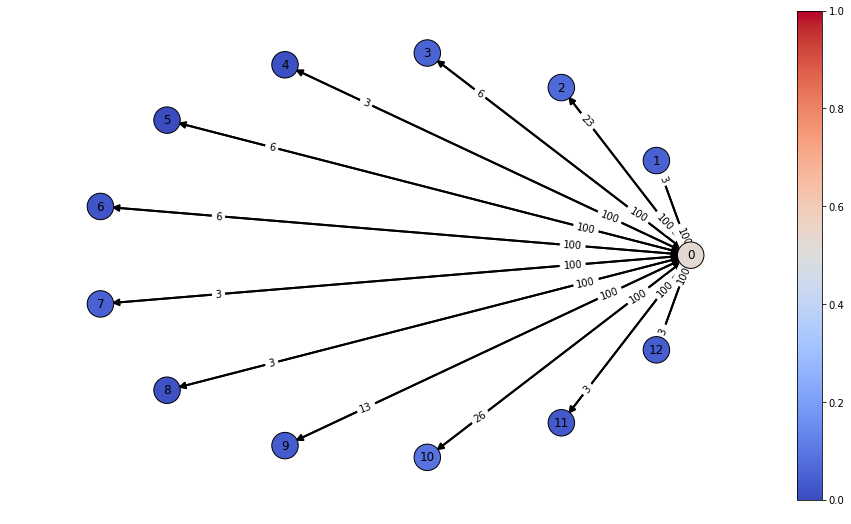

In [16]:
%matplotlib inline
plt.figure(figsize=(16, 9))
atm.plot_nx_graph()

## Comparing other lists of labels to the learned/trained labels
Checks for unknown transitions, total duration of the states(lists should cover the roughly the same time for this to work!!), and relative duration of individual states:

In [17]:
import numpy as np
random_list = [np.random.randint(13) for _ in range(10)]

In [18]:
atm.check(random_list)

--- Checking total state durations ---
Observation has no state 0
Observation has no state 1
Time for state 2 shorter than expected: 97.00s
Time for state 3 shorter than expected: 80.00s
Time for state 4 shorter than expected: 12.00s
Observation has no state 5
Time for state 6 shorter than expected: 28.00s
Time for state 7 shorter than expected: 67.00s
Time for state 8 shorter than expected: 20.00s
Observation has no state 9
Observation has no state 10
Time for state 11 shorter than expected: 45.00s
Observation has no state 12
--- Checking if state changes valid ---
Unknown transitions: 9
Unknown transition 7->11 occurred
Unknown transition 11->6 occurred
Unknown transition 6->3 occurred
Unknown transition 3->8 occurred
Unknown transition 8->4 occurred
Unknown transition 4->11 occurred
Unknown transition 11->8 occurred
Unknown transition 8->11 occurred
Unknown transition 11->2 occurred
--- Checking checking state remaining error ---
Early transition: Duration of state 7 smaller than le